<a href="https://colab.research.google.com/github/WRD397/Practices/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## LOADING

In [2]:
(train_img, train_label), (test_img, test_label) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
train_img.shape

(60000, 28, 28)

In [4]:
type(train_img)

numpy.ndarray

In [5]:
test_img.shape

(10000, 28, 28)

60000 images 28X28

In [6]:
train_label.shape

(60000,)

In [7]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
train_img[0,15,15]

221

The images we are dealing with are basically grey scaled value. So the value is between 0 to 255. 0---> black, 255----> white

In [9]:
pd.Series(train_label).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

So, 10 classes are there.

In [10]:
train_img[2].shape

(28, 28)

So, this is basically a single image. Lets look at the image file now.

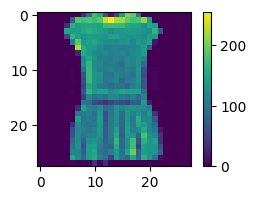

In [11]:
plt.figure(figsize=(3,2))
plt.imshow(train_img[3])
plt.colorbar()
plt.show()


# Data Preprocessing

Now, for a single picture of 28X28 = 784 pixels, one single pixel can have value from 0 to 255. To standardize this, we will divide each pixel by 255.

In [12]:
train_img_scaled = train_img / 255.0
test_img_scaled = test_img / 255.0

In [13]:
train_img_scaled[0].shape

(28, 28)

In [14]:
train_img_scaled[1,12,12]

0.807843137254902

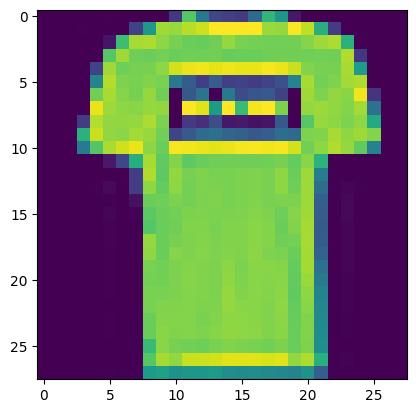

In [15]:
plt.imshow(train_img_scaled[1])

## Building the Model

In [33]:
###layers
l0 = tf.keras.layers.Flatten(input_shape=(28,28))
l1 = tf.keras.layers.Dense(units=512, activation = 'relu')
d1 = tf.keras.layers.Dropout(0.2)
l1 = tf.keras.layers.Dense(units=512, activation = 'relu')
d2 = tf.keras.layers.Dropout(0.2)
l2 = tf.keras.layers.Dense(units=10, activation='softmax')

layers = [l0,l1,l2]
model = tf.keras.Sequential(layers)

## Compiling the Model

In [34]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Fitting 

#### Callback

In [35]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                            mode = 'max',
                                            baseline = 0.90,
                                            min_delta = 0.0001,
                                            patience = 3
                                            )

In [37]:
model.fit(train_img_scaled, train_label, epochs=10, validation_split = 0.2, verbose=2)

Epoch 1/10
1500/1500 - 4s - loss: 0.3058 - accuracy: 0.8864 - val_loss: 0.3438 - val_accuracy: 0.8769 - 4s/epoch - 2ms/step
Epoch 2/10
1500/1500 - 4s - loss: 0.2866 - accuracy: 0.8924 - val_loss: 0.3296 - val_accuracy: 0.8780 - 4s/epoch - 3ms/step
Epoch 3/10
1500/1500 - 4s - loss: 0.2669 - accuracy: 0.9001 - val_loss: 0.3283 - val_accuracy: 0.8849 - 4s/epoch - 2ms/step
Epoch 4/10
1500/1500 - 4s - loss: 0.2571 - accuracy: 0.9022 - val_loss: 0.3312 - val_accuracy: 0.8808 - 4s/epoch - 2ms/step
Epoch 5/10
1500/1500 - 5s - loss: 0.2450 - accuracy: 0.9073 - val_loss: 0.3298 - val_accuracy: 0.8873 - 5s/epoch - 3ms/step
Epoch 6/10
1500/1500 - 4s - loss: 0.2322 - accuracy: 0.9129 - val_loss: 0.3212 - val_accuracy: 0.8906 - 4s/epoch - 2ms/step
Epoch 7/10
1500/1500 - 3s - loss: 0.2243 - accuracy: 0.9164 - val_loss: 0.3077 - val_accuracy: 0.8936 - 3s/epoch - 2ms/step
Epoch 8/10
1500/1500 - 4s - loss: 0.2154 - accuracy: 0.9187 - val_loss: 0.3324 - val_accuracy: 0.8913 - 4s/epoch - 3ms/step
Epoch 9/